#**Fake News Detection** *v2.0*

*Author: Sahil Sharma*

##**Project Overview**

### **Problem Statement**

In today's digital era, the rapid spread of misinformation through online platforms has become a critical challenge. Detecting fake news is essential for ensuring the integrity of information and minimizing its impact on individuals and society. This project aims to build a machine learning-based system to classify news articles as **fake** or **real** based on their content.

---

### **Objective**
To develop a data-driven classification model that can:
1. Analyze news articles using text-based features.
2. Accurately classify articles into two categories: **Fake** (misleading or fabricated information) or **Real** (fact-based and verified news).
3. Provide metrics such as accuracy, precision, recall, and F1-score to evaluate the performance of the classification system.

---

### **Scope**
1. **Input:** A dataset containing news articles with labels (fake or real).
2. **Process:** Data cleaning, preprocessing, feature extraction, and training a machine learning model.
3. **Output:** A prediction label for a given article (fake or real).

---

### **Key Challenges**
1. Identifying subtle linguistic patterns that distinguish fake news from real news.
2. Addressing the imbalance in datasets where one class may dominate.
3. Managing noisy and unstructured data common in textual content.

---

By the end of this project, the system should be able to classify news articles with high accuracy, contributing to efforts to combat the spread of misinformation.

##**Proposed Tech Stack**
- **Programming Language**: Python
- **Data Handling**: pandas, numpy
- **Visualization**: matplotlib, seaborn
- **Text Processing**: nltk, re, gensim
- **Modeling**: scikit-learn, XGBoost
- **Deployment (optional)**: Streamlit or Flask

##**Data Collection**



In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("algord/fake-news")

print("Path to dataset files:", path)

100%|██████████| 1.68M/1.68M [00:00<00:00, 40.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/algord/fake-news/versions/1


###Loading the Dataset

In [ ]:
import os

# Specify the dataset path
dataset_path = "/root/.cache/kagglehub/datasets/algord/fake-news/versions/1"

# List all files in the directory
files = os.listdir(dataset_path)
print("Files in directory:", files)

Files in directory: ['FakeNewsNet.csv']


In [ ]:
import pandas as pd

file_name = "FakeNewsNet.csv"
full_path = os.path.join(dataset_path, file_name)

#load the dataset
df = pd.read_csv(full_path)
print("Dataset loaded successfully!")
print(df.head())


Dataset loaded successfully!
                                               title  \
0  Kandi Burruss Explodes Over Rape Accusation on...   
1  People's Choice Awards 2018: The best red carp...   
2  Sophia Bush Sends Sweet Birthday Message to 'O...   
3  Colombian singer Maluma sparks rumours of inap...   
4  Gossip Girl 10 Years Later: How Upper East Sid...   

                                            news_url        source_domain  \
0  http://toofab.com/2017/05/08/real-housewives-a...           toofab.com   
1  https://www.today.com/style/see-people-s-choic...        www.today.com   
2  https://www.etonline.com/news/220806_sophia_bu...     www.etonline.com   
3  https://www.dailymail.co.uk/news/article-33655...  www.dailymail.co.uk   
4  https://www.zerchoo.com/entertainment/gossip-g...      www.zerchoo.com   

   tweet_num  real  
0         42     1  
1          0     1  
2         63     1  
3         20     1  
4         38     1  


###Inspecting the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23196 entries, 0 to 23195
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          23196 non-null  object
 1   news_url       22866 non-null  object
 2   source_domain  22866 non-null  object
 3   tweet_num      23196 non-null  int64 
 4   real           23196 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 906.2+ KB


In [ ]:
df.describe()

,tweet_num,real
count,23196.000000,23196.000000
mean,88.956803,0.751897
std,488.694592,0.431921
min,0.000000,0.000000
25%,11.000000,1.000000
50%,37.000000,1.000000
75%,65.000000,1.000000
max,29060.000000,1.000000


##**Data Preprocessing**

In [ ]:
#checking for missing values
print(df.isnull().sum())

title              0
news_url         330
source_domain    330
tweet_num          0
real               0
dtype: int64


In [ ]:
#checking for duplicates
print("Duplicates:", df.duplicated().sum())
print("Shape before removing duplicates:", df.shape)

#removing duplicates
df = df.drop_duplicates()
print("Duplicates removed!")

print("Dataset shape after preprocessing:", df.shape)


Duplicates: 137
Shape before removing duplicates: (23196, 5)
Duplicates removed!
Dataset shape after preprocessing: (23059, 5)


In [ ]:
#saving cleaned data

df.to_csv("fakeNewsCleaned.csv", index=False)


##**Exploratoty Data Analysis**

<ipython-input-10-cd58b87e4fc7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette = 'viridis')


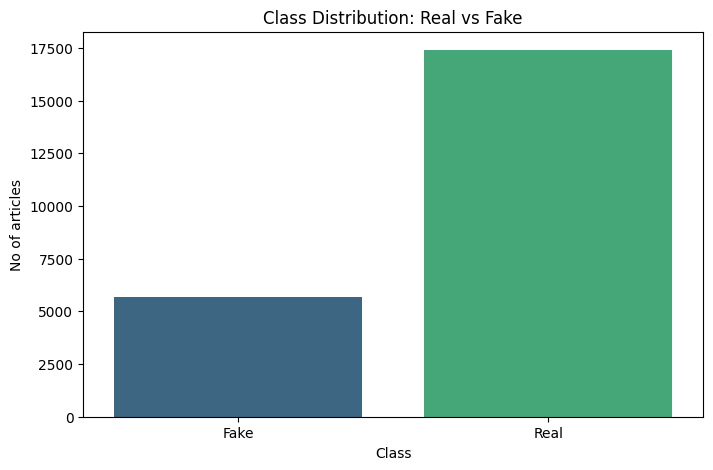

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# class distribution
class_counts = df['real'].value_counts()
plt.figure(figsize=(8,5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette = 'viridis')
plt.title('Class Distribution: Real vs Fake')
plt.xlabel('Class')
plt.ylabel('No of articles')
plt.xticks([0,1], ['Fake', 'Real'])
plt.show()



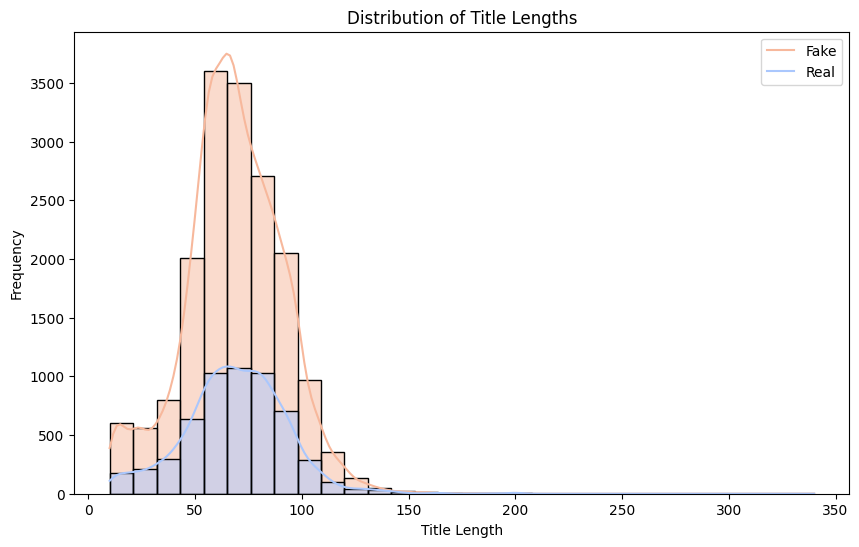

In [ ]:
# Analyzing text lengths in titles

df['title_length']=df['title'].apply(len)
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='title_length', hue='real', kde=True, palette='coolwarm', bins=30)
plt.title('Distribution of Title Lengths')
plt.xlabel('Title Length')
plt.ylabel('Frequency')
plt.legend(['Fake','Real'])
plt.show()

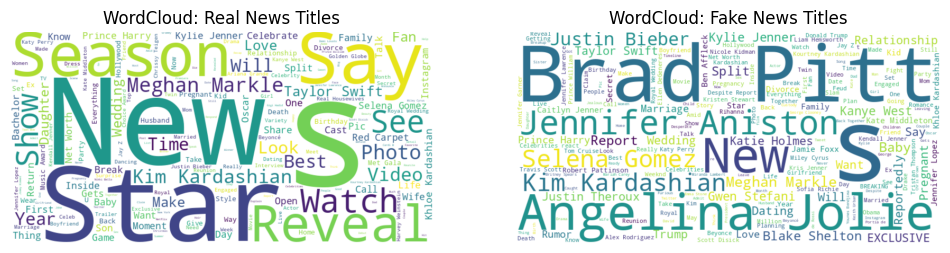

In [ ]:
# word cloud

from wordcloud import WordCloud

real_titles = ' '.join(df[df['real']==1]['title'])
fake_titles = ' '.join(df[df['real']==0]['title'])

real_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(real_titles)
fake_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(fake_titles)

#plotting word clouds
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(real_wordcloud, interpolation='bilinear')
plt.title('WordCloud: Real News Titles')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.title('WordCloud: Fake News Titles')
plt.axis('off')

plt.show()

##**Text Preprocessing**

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

#text preprocesssing function

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stop words and apply stemming
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    # Join tokens back into a single string
    return ' '.join(tokens)

df['cleaned_title'] = df['title'].apply(preprocess_text)

df[['title','cleaned_title']].head()



[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,title,cleaned_title
0,Kandi Burruss Explodes Over Rape Accusation on...,kandi burruss explod rape accus real housew at...
1,People's Choice Awards 2018: The best red carp...,peopl choic award 2018 best red carpet look
2,Sophia Bush Sends Sweet Birthday Message to 'O...,sophia bush send sweet birthday messag one tre...
3,Colombian singer Maluma sparks rumours of inap...,colombian singer maluma spark rumour inappropr...
4,Gossip Girl 10 Years Later: How Upper East Sid...,gossip girl 10 year later upper east sider sho...


##**Feature Extraction and Model building**

In [ ]:
#TF-IDF Vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

tfid = TfidfVectorizer(max_features=5000)
X = tfid.fit_transform(df['cleaned_title']).toarray()
y = df['real']

In [ ]:
#Data Splitting

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Model training

# naive bayes

from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)

#logistic regression

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

In [ ]:
#Eveluation metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)

print("Naive Bayes Model:")
evaluate_model(y_test, y_pred_nb)

print("\nLogistic Regression Model:")
evaluate_model(y_test, y_pred_lr)

Naive Bayes Model:
Accuracy: 0.84
Precision: 0.84
Recall: 0.97
F1 Score: 0.90
Confusion Matrix:
[[ 502  638]
 [ 114 3358]]

Logistic Regression Model:
Accuracy: 0.84
Precision: 0.85
Recall: 0.96
F1 Score: 0.90
Confusion Matrix:
[[ 538  602]
 [ 126 3346]]


In [ ]:
# Model Tuning
# Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

#logistic regression with gridSearch
grid_lr = GridSearchCV(LogisticRegression(max_iter=1000),param_grid_lr, cv=5)
grid_lr.fit(X_train[:1000], y_train[:1000])

best_lr_model = grid_lr.best_estimator_
print("Best Logistic Regression Parameters:", grid_lr.best_params_)

Best Logistic Regression Parameters: {'C': 10}


In [ ]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid
param_dist_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Random Forest with RandomizedSearchCV
random_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_dist_rf, n_iter=10, cv=3, scoring='f1', n_jobs=-1, random_state=42)
random_rf.fit(X_train[:1000], y_train[:1000])

# Best parameters and model
best_rf_model = random_rf.best_estimator_
print("Best Random Forest Parameters:", random_rf.best_params_)

Best Random Forest Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}


In [ ]:
# XGBoost

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# XGBoost with GridSearchCV
grid_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), param_grid_xgb, cv=5, scoring='f1', n_jobs=-1)
grid_xgb.fit(X_train[:1000], y_train[:1000])

# Best parameters and model
best_xgb_model = grid_xgb.best_estimator_
print("Best XGBoost Parameters:", grid_xgb.best_params_)


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:54:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best XGBoost Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}


In [ ]:
# Support Vector Machine

from sklearn.svm import SVC

# Train SVM with default parameters
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train[:1000], y_train[:1000])

# Predictions
y_pred_svm = svm_model.predict(X_test)



In [ ]:
# Evaluation Metrics

# Evaluate Logistic Regression
print("Logistic Regression Performance:")
evaluate_model(y_test, best_lr_model.predict(X_test))

# Evaluate Random Forest
print("\nRandom Forest Performance:")
evaluate_model(y_test, best_rf_model.predict(X_test))

# Evaluate XGBoost
print("\nXGBoost Performance:")
evaluate_model(y_test, best_xgb_model.predict(X_test))

# Evaluate SVM
print("\nSVM Performance:")
evaluate_model(y_test, y_pred_svm)

Logistic Regression Performance:
Accuracy: 0.80
Precision: 0.81
Recall: 0.96
F1 Score: 0.88
Confusion Matrix:
[[ 339  801]
 [ 135 3337]]

Random Forest Performance:
Accuracy: 0.80
Precision: 0.82
Recall: 0.94
F1 Score: 0.88
Confusion Matrix:
[[ 426  714]
 [ 191 3281]]

XGBoost Performance:
Accuracy: 0.77
Precision: 0.78
Recall: 0.98
F1 Score: 0.87
Confusion Matrix:
[[ 174  966]
 [  78 3394]]

SVM Performance:
Accuracy: 0.80
Precision: 0.81
Recall: 0.97
F1 Score: 0.88
Confusion Matrix:
[[ 338  802]
 [ 101 3371]]


##**Sava the Model**

In [ ]:
import joblib

# Save the best Logistic Regression model
joblib.dump(best_lr_model, 'logistic_regression_model.pkl')
print("Model saved as 'logistic_regression_model.pkl'")


Model saved as 'logistic_regression_model.pkl'


In [ ]:
# Load the saved model
loaded_model = joblib.load('logistic_regression_model.pkl')

##**Visualizition of results**

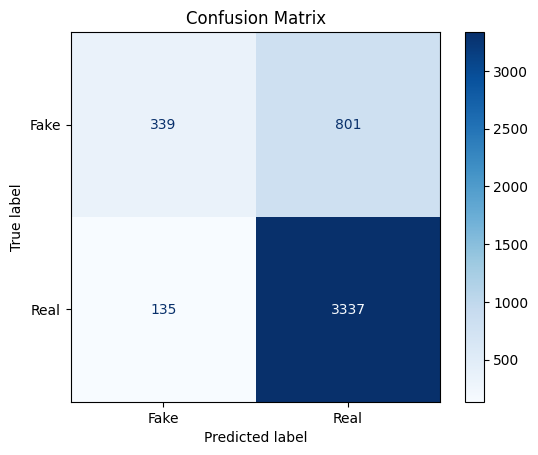

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on test data
y_pred = best_lr_model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fake", "Real"])

# Plot confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

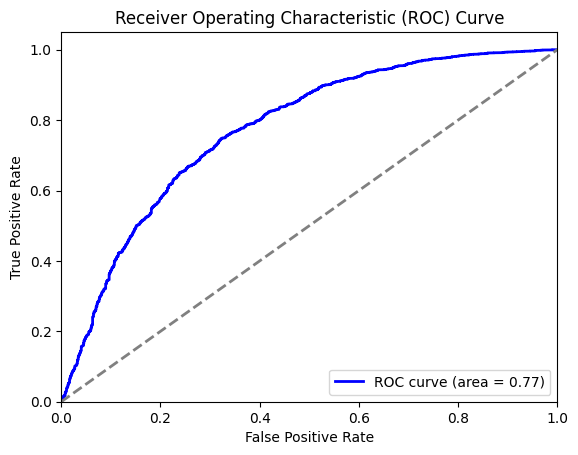

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get probabilities for ROC curve
y_prob = best_lr_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()